<a href="https://colab.research.google.com/github/titusjscott/Deep-Learning-Project/blob/main/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv("https://raw.githubusercontent.com/titusjscott/Deep-Learning-Project/main/fashion-mnist_test.csv")

In [3]:
train = pd.read_csv("https://www.dropbox.com/s/vvvdjehgx6f39wu/fashion-mnist_train.csv?dl=1")

In [4]:
# Split the train data into x_train and y_train
x_train = train.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train.iloc[:, 0].values

In [5]:
# Split the test data into x_test and y_test
x_test = test.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test.iloc[:, 0].values

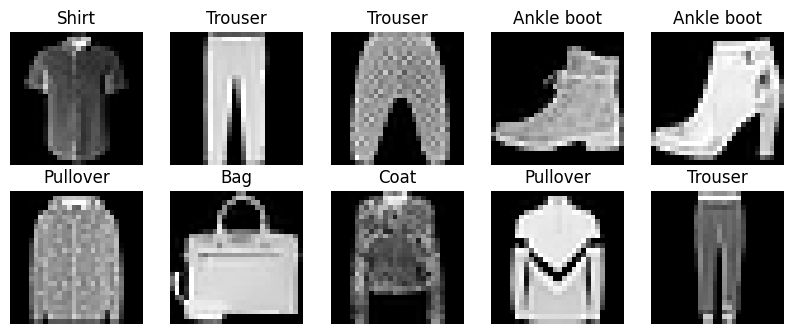

In [6]:
# Define the class labels
class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Plot a sample of 10 images with labels
plt.figure(figsize=(10, 10))
for i in range(10):
    idx = np.random.randint(len(x_train))
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[idx].reshape(28, 28), cmap='gray')
    plt.title(class_labels[y_train[idx]])
    plt.axis('off')
plt.show()

In [7]:
# Split the train data into train and validation sets
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Autoencoder Model

In [8]:
# Define the encoder model
encoder_input = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(encoder_input)
x = tf.keras.layers.MaxPooling2D(2, padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(2, padding='same')(x)
x = tf.keras.layers.Flatten()(x)
encoded = tf.keras.layers.Dense(64, activation='relu')(x)

encoder = tf.keras.models.Model(encoder_input, encoded)

# Define the classification model
classifier = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the classification model
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Extract features from the input data using the encoder
x_train_features = encoder.predict(x_train)
x_test_features = encoder.predict(x_test)

# Train the classification model on the extracted features
classifier.fit(x_train_features, y_train, validation_data=(x_test_features, y_test), epochs=10, batch_size=256)

# Evaluate the performance of the classification model on the test data
test_loss, test_acc = classifier.evaluate(x_test_features, y_test)
print('Test accuracy:', test_acc)

# Print a classification report to provide additional evaluation metrics
y_pred = classifier.predict(x_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 1.6498 - accuracy: 0.5125 - val_loss: 1.1388 - val_accuracy: 0.6473
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.9616 - accuracy: 0.6932 - val_loss: 0.8400 - val_accuracy: 0.7214
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.7776 - accuracy: 0.7321 - val_loss: 0.7327 - val_accuracy: 0.7363
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.7023 - accuracy: 0.7475 - val_loss: 0.6771 - val_accuracy: 0.7530
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6631 - accuracy: 0.7577 - val_loss: 0.6472 - val_accuracy: 0.7621
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6381 - accuracy: 0.7652 - val_loss: 0.6254 - val_accuracy: 0.7686
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6197 - accuracy:

In [9]:
## Add dropout and batch normalization layers to improve performance. Add number of epochs to 20 for more training time

# Define the encoder model
encoder_input = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(encoder_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(2, padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(2, padding='same')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
encoded = tf.keras.layers.Dense(64, activation='relu')(x)

encoder = tf.keras.models.Model(encoder_input, encoded)

# Define the classification model
classifier = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the classification model
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Extract features from the input data using the encoder
x_train_features = encoder.predict(x_train)
x_test_features = encoder.predict(x_test)

# Train the classification model on the extracted features
classifier.fit(x_train_features, y_train, validation_data=(x_test_features, y_test), epochs=20, batch_size=256)

# Evaluate the performance of the classification model on the test data
test_loss, test_acc = classifier.evaluate(x_test_features, y_test)
print('Test accuracy:', test_acc)

# Print a classification report to provide additional evaluation metrics
y_pred = classifier.predict(x_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 14ms/step
Epoch 1/20
235/235 [==============================] - 3s 8ms/step - loss: 0.9996 - accuracy: 0.6446 - val_loss: 1.7745 - val_accuracy: 0.6262
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.6927 - accuracy: 0.7504 - val_loss: 0.9548 - val_accuracy: 0.7808
Epoch 3/20
235/235 [==============================] - 2s 6ms/step - loss: 0.6417 - accuracy: 0.7672 - val_loss: 0.5998 - val_accuracy: 0.7896
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.6182 - accuracy: 0.7763 - val_loss: 0.5675 - val_accuracy: 0.7900
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.6012 - accuracy: 0.7814 - val_loss: 0.5476 - val_accuracy: 0.7967
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.5900 - accuracy: 0.7860 - val_loss: 0.5421 - val_accuracy: 0.7972
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.5808 - accuracy:

CNN Model

In [10]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 71s 37ms/step - loss: 0.5186 - accuracy: 0.8084 - val_loss: 0.3668 - val_accuracy: 0.8667
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3336 - accuracy: 0.8781 - val_loss: 0.3373 - val_accuracy: 0.8694
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2833 - accuracy: 0.8959 - val_loss: 0.2721 - val_accuracy: 0.8975
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2513 - accuracy: 0.9075 - val_loss: 0.2509 - val_accuracy: 0.9064
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2277 - accuracy: 0.9152 - val_loss: 0.2500 - val_accuracy: 0.9086
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2079 - accuracy: 0.9231 - val_loss: 0.2436 - val_accuracy: 0.9151
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1900 - accuracy: 0.9292 - val_loss: 0.2519 -

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.94      0.80      0.86      1000
           3       0.93      0.91      0.92      1000
           4       0.85      0.89      0.87      1000
           5       0.97      0.99      0.98      1000
           6       0.74      0.76      0.75      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



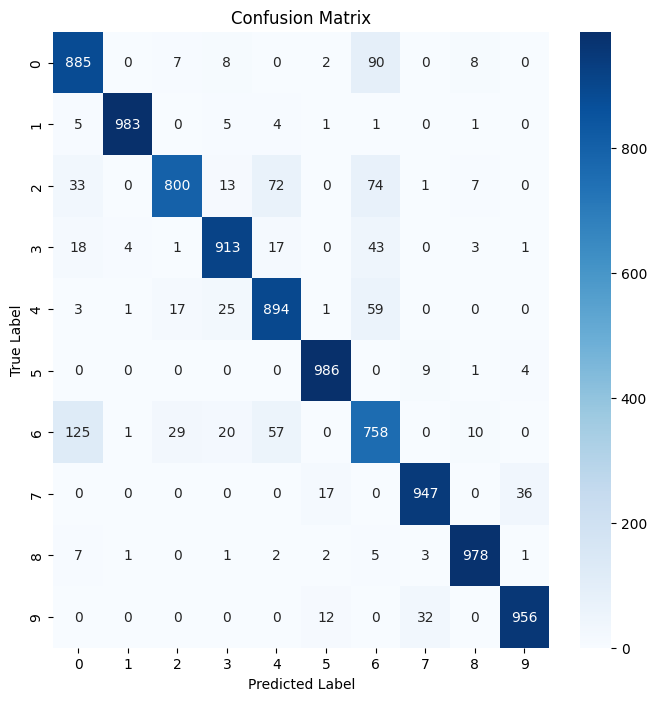

In [11]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Epoch 1/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.7788 - accuracy: 0.7120 - val_loss: 0.4588 - val_accuracy: 0.8208 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.5276 - accuracy: 0.8069 - val_loss: 0.3836 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.4684 - accuracy: 0.8305 - val_loss: 0.3432 - val_accuracy: 0.8794 - lr: 0.0010
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.4296 - accuracy: 0.8458 - val_loss: 0.3140 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.4053 - accuracy: 0.8536 - val_loss: 0.2973 - val_accuracy: 0.8888 - lr: 0.0010
Epoch 6/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.3907 - accuracy: 0.8599 - val_loss: 0.2865 - val_accuracy: 0.8915 - lr: 0.0010
Epoch 7/10
1875/1875 [========================

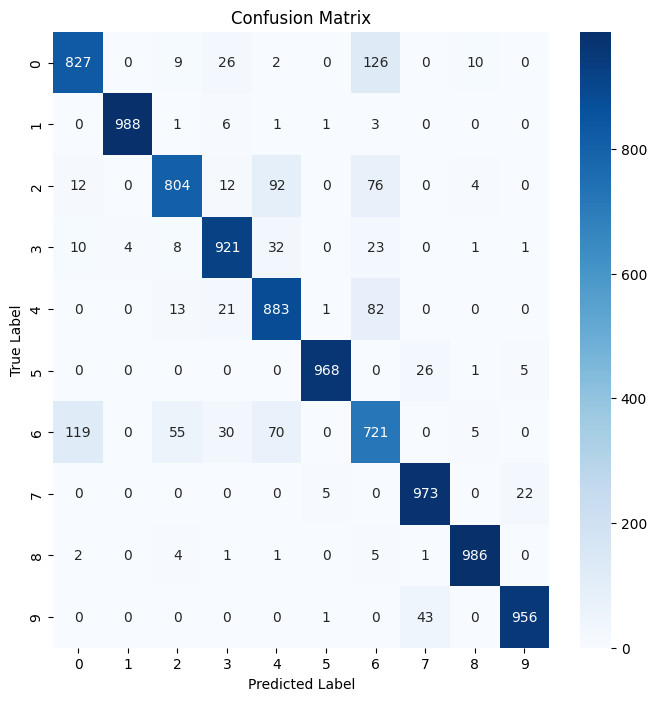

In [12]:
# Define the adapted CNN model with dropout rate and learning rate defined
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Define the learning rate scheduler
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 5:
        lr = 0.0001
    return lr

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[keras.callbacks.LearningRateScheduler(lr_schedule)])


y_pred = np.argmax(model.predict(x_test), axis=-1)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



t-SNE Model

<ipython-input-13-d39499ac0312>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_output[:, 0], tsne_output[:, 1], c=y_train[:1000], cmap=plt.cm.get_cmap("jet", 10))


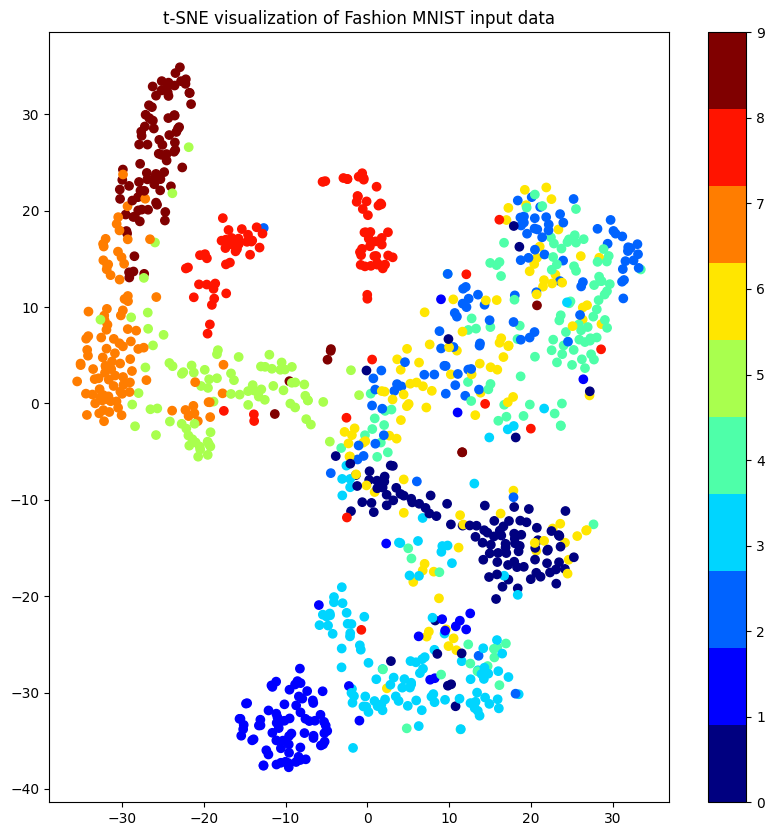

In [13]:
# t-SNE
# Reshape the input data to a 2D array
x_train_tsne = np.reshape(x_train, (x_train.shape[0], -1))
x_test_tsne = np.reshape(x_test, (x_test.shape[0], -1))

# Perform t-SNE on the input data
tsne = TSNE(n_components=2, random_state=0)
tsne_output = tsne.fit_transform(x_train_tsne[:1000])

# Plot the t-SNE visualization
plt.figure(figsize=(10, 10))
plt.scatter(tsne_output[:, 0], tsne_output[:, 1], c=y_train[:1000], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar()
plt.title("t-SNE visualization of Fashion MNIST input data")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


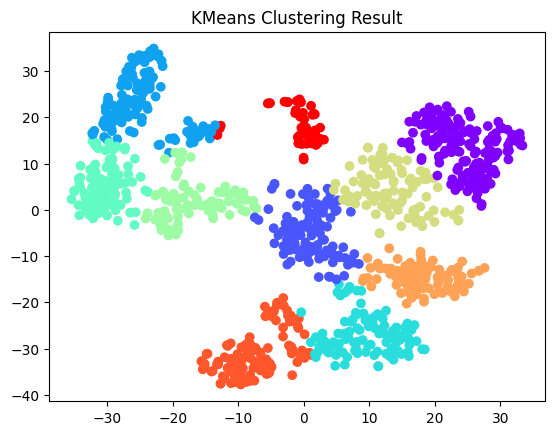

Clustering Accuracy: 0.149


In [14]:
# slice y_train to match the size of tsne_output
y_train_sliced = y_train[:tsne_output.shape[0]]

# perform KMeans clustering on the t-SNE output
kmeans = KMeans(n_clusters=10, random_state=0).fit(tsne_output)

# plot the clustering result
plt.scatter(tsne_output[:,0], tsne_output[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title("KMeans Clustering Result")
plt.show()

# calculate the clustering accuracy
cluster_acc = np.sum(y_train_sliced == kmeans.labels_) / len(y_train_sliced)
print("Clustering Accuracy:", cluster_acc)


<ipython-input-15-3f301387412d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_output[:, 0], tsne_output[:, 1], c=y_train[:1500], cmap=plt.cm.get_cmap("jet", 10))


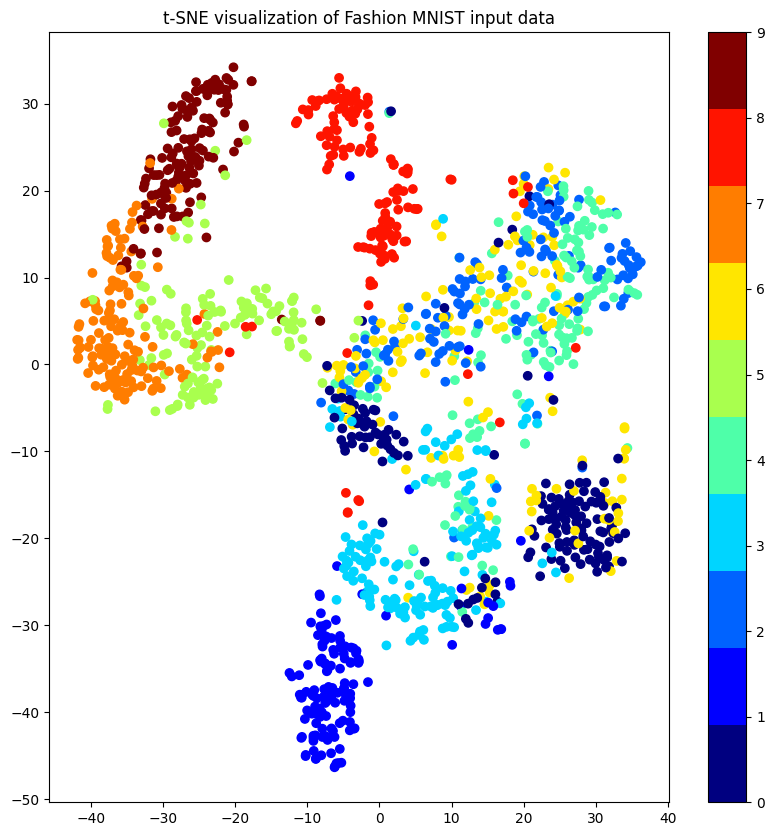

In [15]:
# t-SNE
# Reshape the input data to a 2D array
x_train_tsne = np.reshape(x_train, (x_train.shape[0], -1))
x_test_tsne = np.reshape(x_test, (x_test.shape[0], -1))

# Perform t-SNE on the input data
tsne = TSNE(perplexity=35, n_components=2, random_state=0)
tsne_output = tsne.fit_transform(x_train_tsne[:1500])

# Plot the t-SNE visualization
plt.figure(figsize=(10, 10))
plt.scatter(tsne_output[:, 0], tsne_output[:, 1], c=y_train[:1500], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar()
plt.title("t-SNE visualization of Fashion MNIST input data")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


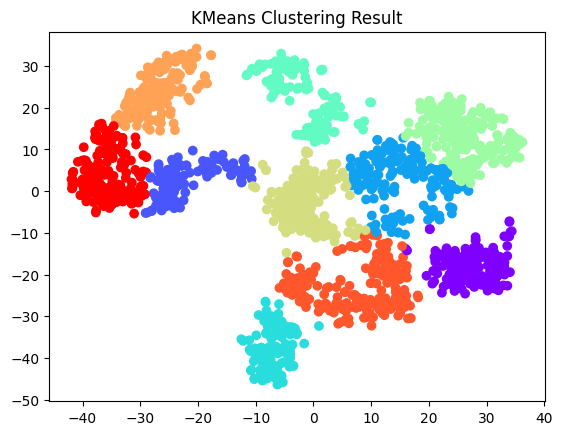

Clustering Accuracy: 0.136


In [16]:
# slice y_train to match the size of tsne_output
y_train_sliced = y_train[:tsne_output.shape[0]]

# perform KMeans clustering on the t-SNE output
kmeans = KMeans(n_clusters=10, random_state=0).fit(tsne_output)

# plot the clustering result
plt.scatter(tsne_output[:,0], tsne_output[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title("KMeans Clustering Result")
plt.show()

# calculate the clustering accuracy
cluster_acc = np.sum(y_train_sliced == kmeans.labels_) / len(y_train_sliced)
print("Clustering Accuracy:", cluster_acc)


<ipython-input-17-b1e391bbea00>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train[:1500], cmap=plt.cm.get_cmap("jet", 10))


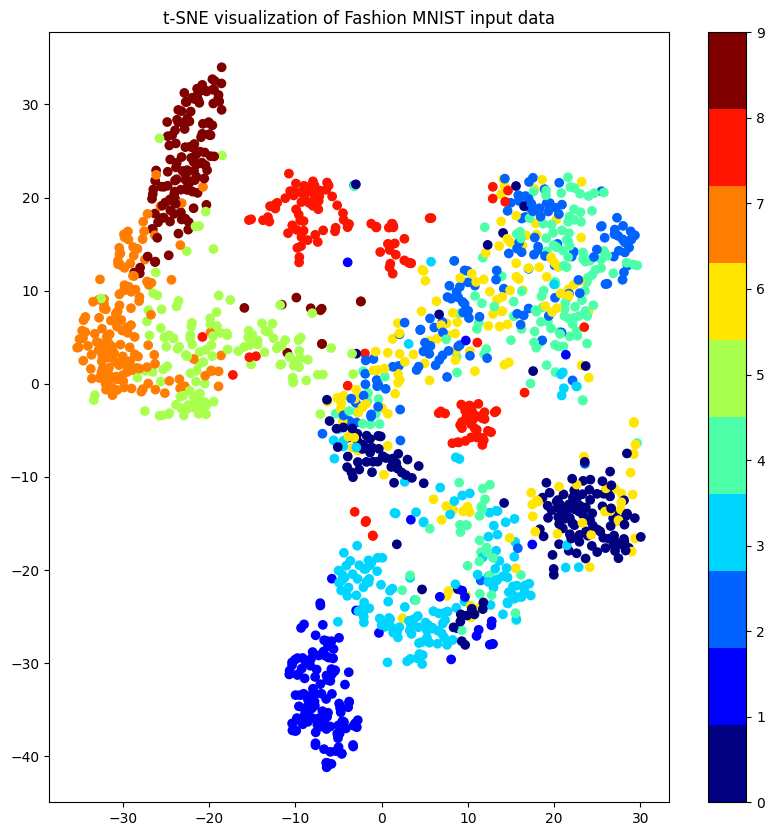

In [17]:
# t-SNE
# Reshape the input data to a 2D array
x_train_tsne = np.reshape(x_train, (x_train.shape[0], -1))
x_test_tsne = np.reshape(x_test, (x_test.shape[0], -1))

# Perform t-SNE on the input data
tsne = TSNE(perplexity=45, n_components=2, random_state=0)
x_tsne = tsne.fit_transform(x_train_tsne[:1500])

# Plot the t-SNE visualization
plt.figure(figsize=(10, 10))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train[:1500], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar()
plt.title("t-SNE visualization of Fashion MNIST input data")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


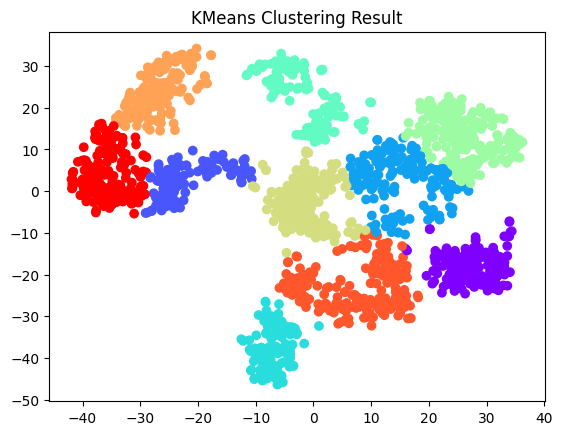

Clustering Accuracy: 0.136


In [18]:
# slice y_train to match the size of tsne_output
y_train_sliced = y_train[:tsne_output.shape[0]]

# perform KMeans clustering on the t-SNE output
kmeans = KMeans(n_clusters=10, random_state=0).fit(tsne_output)

# plot the clustering result
plt.scatter(tsne_output[:,0], tsne_output[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title("KMeans Clustering Result")
plt.show()

# calculate the clustering accuracy
cluster_acc = np.sum(y_train_sliced == kmeans.labels_) / len(y_train_sliced)
print("Clustering Accuracy:", cluster_acc)


<ipython-input-19-a891c7fa0718>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train[:2000], cmap=plt.cm.get_cmap("jet", 10))


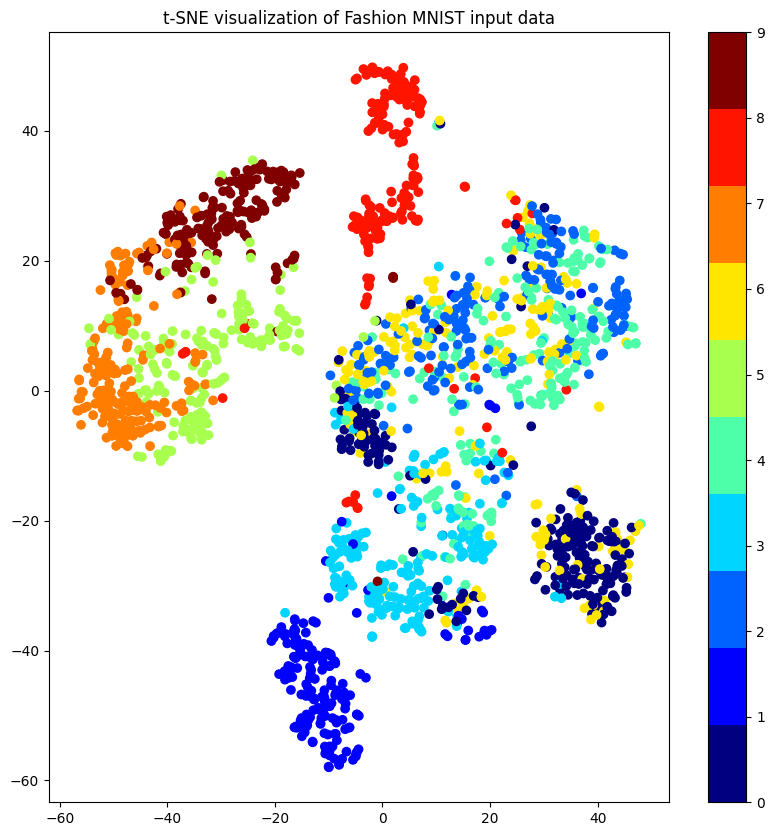

In [19]:
# t-SNE
# Reshape the input data to a 2D array
x_train_tsne = np.reshape(x_train, (x_train.shape[0], -1))
x_test_tsne = np.reshape(x_test, (x_test.shape[0], -1))

# Perform t-SNE on the input data
tsne = TSNE(perplexity=25, n_components=2, random_state=0)
x_tsne = tsne.fit_transform(x_train_tsne[:2000])

# Plot the t-SNE visualization
plt.figure(figsize=(10, 10))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train[:2000], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar()
plt.title("t-SNE visualization of Fashion MNIST input data")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


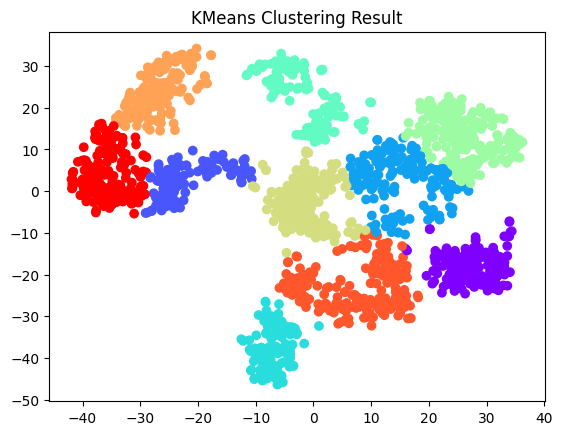

Clustering Accuracy: 0.136


In [20]:
# slice y_train to match the size of tsne_output
y_train_sliced = y_train[:tsne_output.shape[0]]

# perform KMeans clustering on the t-SNE output
kmeans = KMeans(n_clusters=10, random_state=0).fit(tsne_output)

# plot the clustering result
plt.scatter(tsne_output[:,0], tsne_output[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title("KMeans Clustering Result")
plt.show()

# calculate the clustering accuracy
cluster_acc = np.sum(y_train_sliced == kmeans.labels_) / len(y_train_sliced)
print("Clustering Accuracy:", cluster_acc)


<ipython-input-21-8950356cc4c4>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train[:1000], cmap=plt.cm.get_cmap("jet", 10))


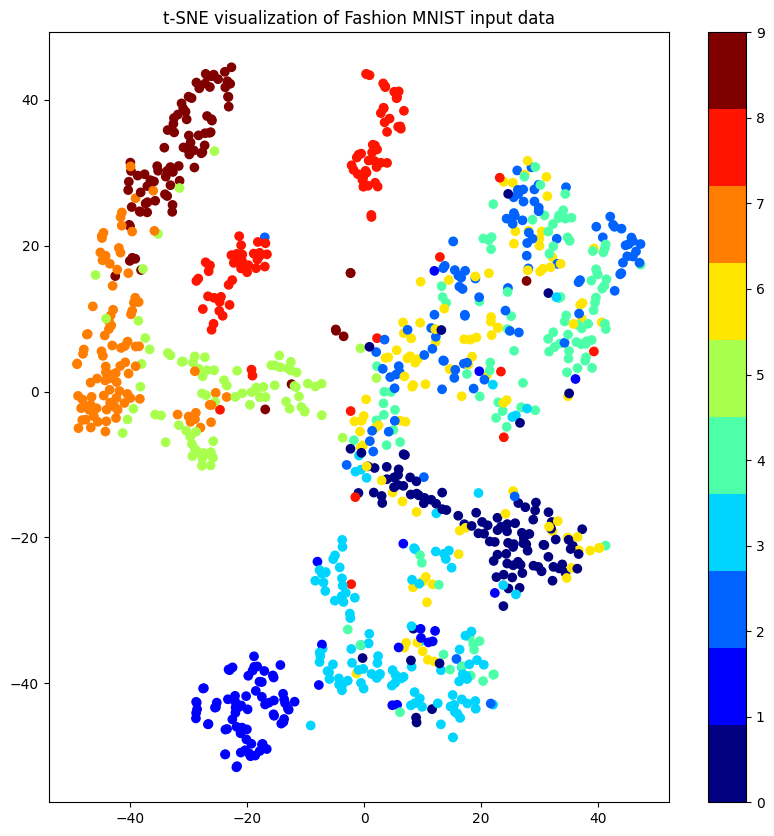

In [21]:
# Reshape the input data to a 2D array
x_train_tsne = np.reshape(x_train, (x_train.shape[0], -1))
x_test_tsne = np.reshape(x_test, (x_test.shape[0], -1))

# Perform t-SNE on the input data
tsne = TSNE(perplexity = 15, n_components=2, random_state=0)
x_tsne = tsne.fit_transform(x_train_tsne[:1000])

# Plot the t-SNE visualization
plt.figure(figsize=(10, 10))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train[:1000], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar()
plt.title("t-SNE visualization of Fashion MNIST input data")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


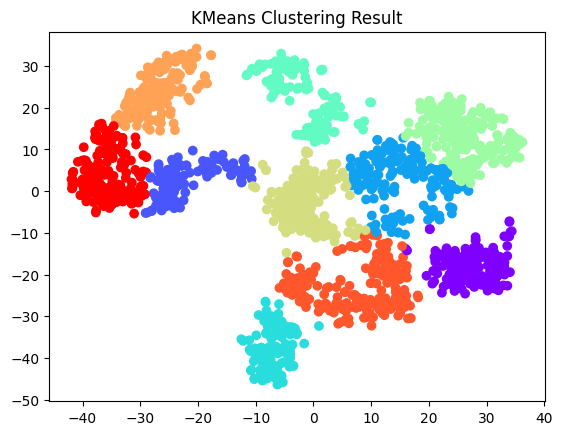

Clustering Accuracy: 0.136


In [22]:
# slice y_train to match the size of tsne_output
y_train_sliced = y_train[:tsne_output.shape[0]]

# perform KMeans clustering on the t-SNE output
kmeans = KMeans(n_clusters=10, random_state=0).fit(tsne_output)

# plot the clustering result
plt.scatter(tsne_output[:,0], tsne_output[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title("KMeans Clustering Result")
plt.show()

# calculate the clustering accuracy
cluster_acc = np.sum(y_train_sliced == kmeans.labels_) / len(y_train_sliced)
print("Clustering Accuracy:", cluster_acc)